In [31]:
#importing parkages
import pandas as pd 
import numpy as np

# Import Scikit-learn helper functions

#for Data Segementation
import sklearn
from sklearn.model_selection import train_test_split
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# metric functions
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import confusion_matrix

#for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
#to shut warnings from the notebook
import warnings
warnings.filterwarnings('ignore')

In [22]:
data = pd.read_csv('dataset1.csv')
data =data.sample(frac = 1)
data = data.fillna(0)
data = data.reset_index(drop = True)
data.head()

,src_ip,src_port,dest_ip,dest_port,protocol,class
0,137.184.97.204,46174.0,44.202.53.88,5900.0,vnc,heralding
1,90.151.171.106,18426.0,44.202.53.88,1080.0,socks5,suricata
2,137.184.97.204,50228.0,44.202.53.88,5900.0,vnc,heralding
3,172.28.0.2,445.0,180.183.245.97,56773.0,smbd,dionaea
4,45.95.233.11,2047.0,44.202.53.88,5900.0,vnc,heralding


In [23]:
src_ip = []
dest_ip = []
def ip_clean(x):
    for i in x.src_ip:
        src_ip.append(int(i.replace('.','')))
    for i in x.dest_ip:
        dest_ip.append(int(str(i).replace('.','')))
ip_clean(data)

In [24]:
data['src_ip'] = src_ip
data["dest_ip"] = dest_ip

In [25]:
X = data.loc[ : ,:'protocol']
X= X.fillna(0)
y = data['class']

dataset = X
# change strings to categories
for label, content in X.items():
    if pd.api.types.is_string_dtype(content):
        X[label] = content.astype('category').cat.as_ordered()
# Turn the categorical columns to numbers and then fill missing
for label, content in X.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Turn the categories to number and fill missing values with +1 , we are adding +1 because pandas see missing as -ve
        X[label] = pd.Categorical(content).codes + 1
# X["src_ip"], X['dest_ip'] = data['src_ip'],data['dest_ip']
# X= X.fillna(0)

In [26]:
X.isnull().sum()

src_ip       0
src_port     0
dest_ip      0
dest_port    0
protocol     0
dtype: int64

In [27]:
print(X), print(y)

            src_ip  src_port      dest_ip  dest_port  protocol
0      13718497204   46174.0    442025388     5900.0        23
1      90151171106   18426.0    442025388     1080.0        19
2      13718497204   50228.0    442025388     5900.0        23
3          1722802     445.0  18018324597    56773.0        17
4        459523311    2047.0    442025388     5900.0        23
...            ...       ...          ...        ...       ...
73420  13718497204   34848.0      1723002     5900.0        23
73421  13718497204   57298.0    442025388     5900.0        23
73422      1722802     445.0  18018324597    52017.0        17
73423      1722802     445.0  18018324597    56442.0        17
73424  13718497204   59550.0    442025388     5900.0        23

[73425 rows x 5 columns]
0        heralding
1         suricata
2        heralding
3          dionaea
4        heralding
           ...    
73420     suricata
73421     suricata
73422      dionaea
73423      dionaea
73424     suricata
Name: cla

(None, None)

In [28]:
X.isnull().sum()

src_ip       0
src_port     0
dest_ip      0
dest_port    0
protocol     0
dtype: int64

In [29]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)
seed = 7

scoring = 'accuracy'
# Spot Check Algorithms
models = []
models.append(('Linear Regrssion', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('NN', MLPClassifier()))

# evaluate each model in turn
results = []
names = []
std =[]
for name, model in models:
    kfold = sklearn.model_selection.KFold(n_splits=10)
    cv_results = sklearn.model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results.mean())
    names.append(name)
    std.append(cv_results.std())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


Linear Regrssion: 0.516158 (0.008404)
KNN: 0.723797 (0.005060)
Decision Tree: 0.679612 (0.004498)
NN: 0.696557 (0.062279)


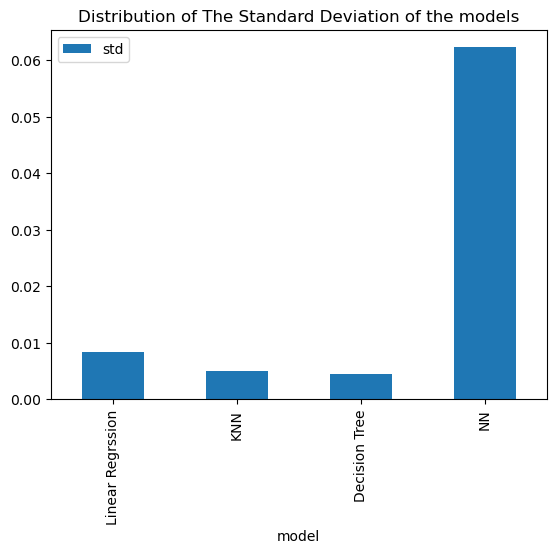


The Nural Network (MLPClassifier) tends to have a high standard deviation with smaller accuracy followed by the Linear Regression Model
Decision Tree has a near Zero standard Deviation on the training set and 0 on the test set which portrays an overfitting
The KNN is therefore the best performing model with a Standard deviation of 0.012605 and accuracy of 95%


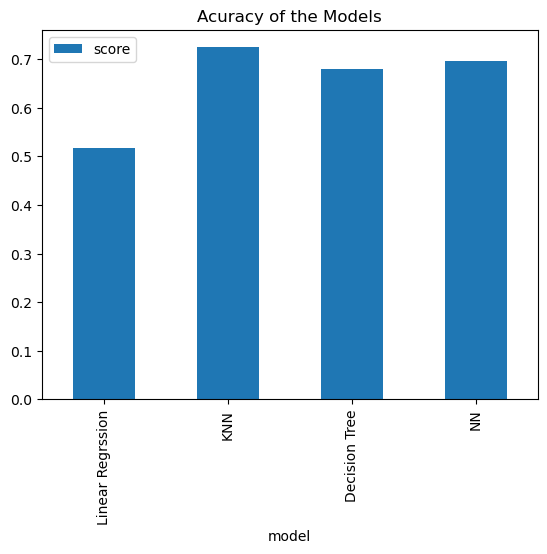

In [32]:
matrix = pd.DataFrame(zip(results, names), columns =['score', 'model'])
matrix['std'] = std
matrix.plot(kind = 'bar', x ='model', y = 'std', title = 'Distribution of The Standard Deviation of the models')
plt.show()
print("\nThe Nural Network (MLPClassifier) tends to have a high standard deviation with smaller accuracy followed by the Linear Regression Model\nDecision Tree has a near Zero standard Deviation on the training set and 0 on the test set which portrays an overfitting\nThe KNN is therefore the best performing model with a Standard deviation of 0.012605 and accuracy of 95%")
matrix.plot(kind ='bar', x= 'model', y = 'score', title = 'Acuracy of the Models');

              precision    recall  f1-score   support

      cowrie       1.00      1.00      1.00      3949
     dionaea       1.00      1.00      1.00      4516
   heralding       0.29      0.29      0.29      4508
   honeytrap       1.00      1.00      1.00      4566
    suricata       0.28      0.27      0.27      4489

    accuracy                           0.70     22028
   macro avg       0.71      0.71      0.71     22028
weighted avg       0.70      0.70      0.70     22028



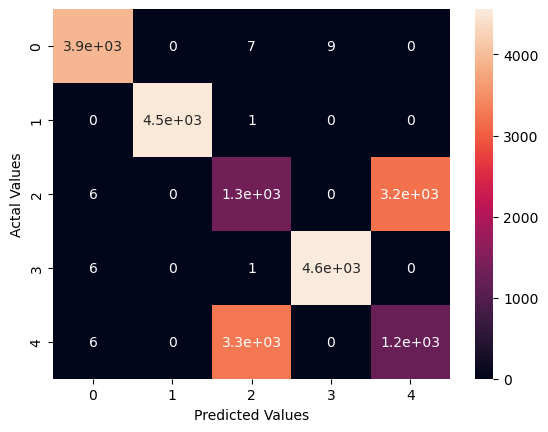

In [38]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_predict = KNN.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print(classification_report(y_test,y_predict))

sns.heatmap(cm, annot = True)
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()



In [46]:
for model in models:
    model[1].fit(X_train, y_train)
    y_predict = model[1].predict(X_test)
    cm = confusion_matrix(y_test, y_predict)

    print(f'Classification Report for {model[1]}\n\n----------------------------------\n',classification_report(y_test,y_predict))



Classification Report for LogisticRegression()

----------------------------------
               precision    recall  f1-score   support

      cowrie       0.73      0.87      0.80      3949
     dionaea       1.00      1.00      1.00      4516
   heralding       0.05      0.00      0.01      4508
   honeytrap       0.30      0.74      0.43      4566
    suricata       0.00      0.00      0.00      4489

    accuracy                           0.51     22028
   macro avg       0.41      0.52      0.45     22028
weighted avg       0.41      0.51      0.44     22028

Classification Report for KNeighborsClassifier()

----------------------------------
               precision    recall  f1-score   support

      cowrie       1.00      1.00      1.00      3949
     dionaea       1.00      1.00      1.00      4516
   heralding       0.29      0.29      0.29      4508
   honeytrap       1.00      1.00      1.00      4566
    suricata       0.28      0.27      0.27      4489

    accuracy   

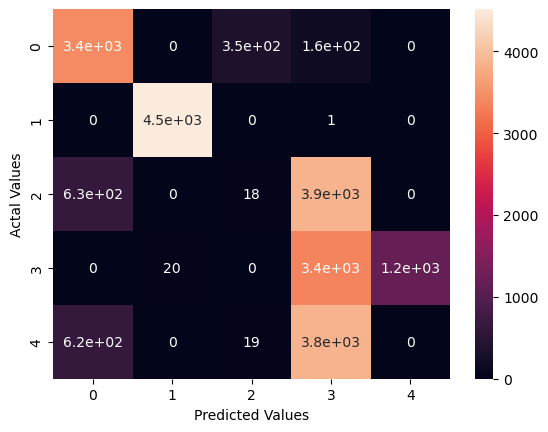

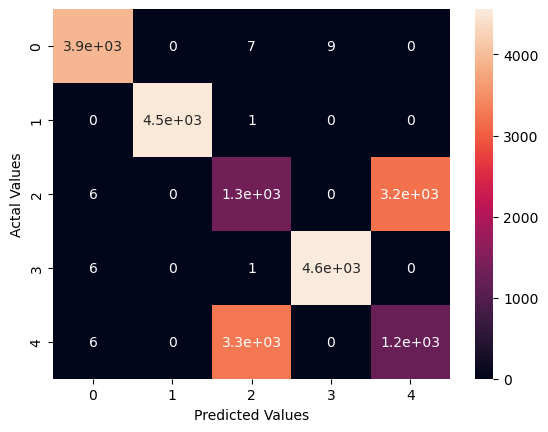

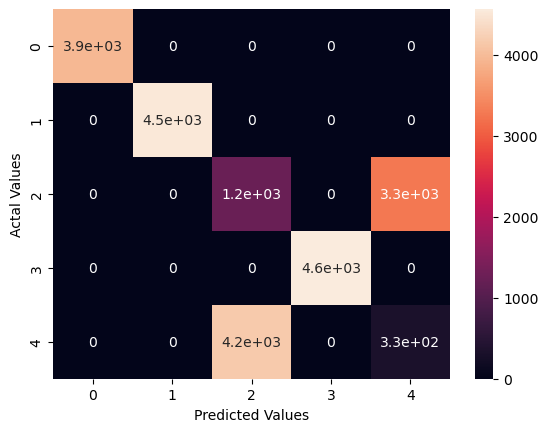

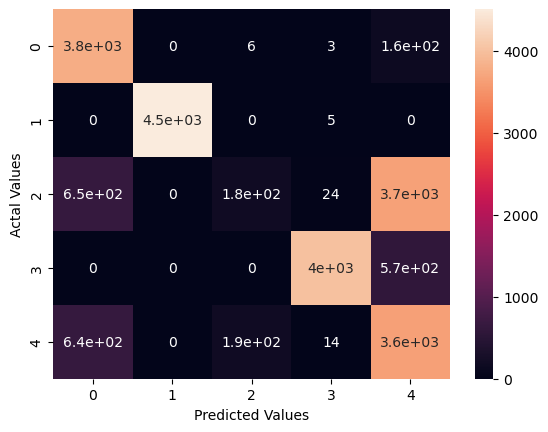

In [47]:
for model in models:
    model[1].fit(X_train, y_train)
    y_predict = model[1].predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    sns.heatmap(cm, annot = True)
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

#     print(f'Classification Report for {model[1]}\n\n----------------------------------\n',classification_report(y_test,y_predict))


